In [1]:
import numpy as np
import csv
import time
import datetime as dt
import pandas as pd
import copy
import math
import os
import peakutils
import spectrum
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

Normally, pulse: 0.5-3 Hz, breath: 0.1-0.5 Hz, speaking: >80 Hz

In [8]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
#=========================================================================================
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = signal.butter(order, [low, high], btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
#=========================================================================================
def gain_freq(temp_df):
    sampling_rate = 1000 # In Hz
    filtered_signal_b = butter_bandpass_filter(temp_df['Current (A)'].values, 0.1, 0.5, sampling_rate, 2)
    time_b = np.arange(len(filtered_signal_b))
    sp_b = np.fft.fft(filtered_signal_b)
    freq_list_b = np.fft.fftfreq(time_b.shape[-1], d=1/sampling_rate)
    freq_b = abs(freq_list_b[np.argmax(abs(sp_b.real))])
    
    filtered_signal_p = butter_bandpass_filter(temp_df['Current (A)'].values, 0.5, 3, sampling_rate, 2)
    time_p = np.arange(len(filtered_signal_p))
    sp_p = np.fft.fft(filtered_signal_p)
    freq_list_p = np.fft.fftfreq(time_p.shape[-1], d=1/sampling_rate)
    freq_p = abs(freq_list_p[np.argmax(abs(sp_p.real))])
    
    print('breath:{:.4f}, pulse:{:.4f}'.format(freq_b, freq_p))
    
    return freq_b, freq_p

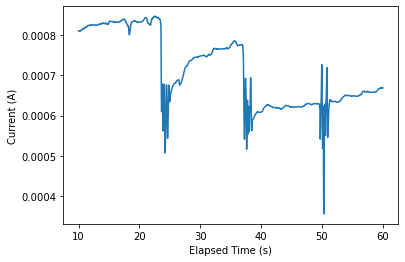

breath:0.1600, pulse:1.5400


(0.16000320006400126, 1.5400308006160122)

In [9]:
#temp_df = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/useless_data/Nov_18/normal breath 300s_8s interval.txt',sep = "\t")
#temp_df = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/useless_data/Oct_19/breath/normal breath.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 80 breath 14.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 81 breath 14.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 82 breath 14.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 83 breath 14.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 83 breath 17.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath only/pulse 88 min-breath-17 min.txt',sep = "\t")

#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 80 breath 14 noding at 22s 36s 49s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 80 breath 14 shaking at 24s 36s 50s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 81 breath 14 shaking 21s 33s 45s 57s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 81 breath 14 shaking at 24s 36s 48s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 83 breath 13 noding at 21s 32s 47s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement/pulse 84 breath 13 noding at 31s 44s 55s.txt',sep = "\t")

#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 74 breath 16 speaking no at 21s 33s 44s 52s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 77 breath 15 speaking yes at24s 37s 50s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 79 breath 14 speaking yes at25s 38s 52s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 80 breath 13 speaking no at26s 47s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 80 breath 15 speaking no at 23s 35s 47s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 84 breath 14 peaking no at 26s 38s 52s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+speaking/pulse 84 breath 14 speaking yes at 24s 38s 51s.txt',sep = "\t")

#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 74 breath 15 speaking yes+ noding head at 23s 36s 49s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 76 breath 14 speaking yes+ noding head at 26s 39s 53s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 77 breath 13 peaking yes+ noding head at 27s 40s 53s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 77 breath 15 speaking no+ shaking head at 22s 34s 48s.txt',sep = "\t")
#temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 78 breath 16 speaking no+ shaking head at 19s 32s 43s 55s.txt',sep = "\t")
temp_df_ori = pd.read_csv('D://Xin Zhang/Sensor/wenlong-main/data/pulse+breath data/pulse+breath+movement+speaking/pulse 79 breath 15 speaking no+ shaking head at 23s 37s 49s.txt',sep = "\t")

temp_df = temp_df_ori.loc[10000:,:]
#plt.plot(temp_df['Current (A)'])
sns.lineplot(x='Elapsed Time (s)',y='Current (A)',data=temp_df)
#plt.title("Normal breathing")
plt.show()
gain_freq(temp_df)

## Analysis

### breath frequency

Text(0.5, 1.0, 'Normal breathing (Filtered)_bandpass')

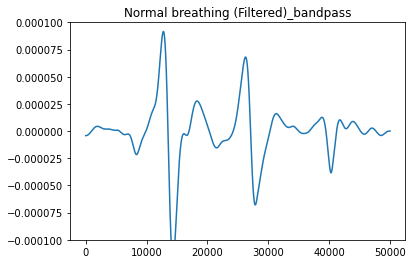

In [4]:
sampling_rate = 1000
filtered_signal_2 = butter_bandpass_filter(temp_df['Current (A)'].values, 0.1, 0.5, sampling_rate, 2)
plt.plot(filtered_signal_2)
plt.ylim(-0.0001,0.0001)
plt.title("Normal breathing (Filtered)_bandpass")

The frequency of normal breath is 0.16000320006400126


Text(0.5, 1.0, 'Normal breathing frequency response')

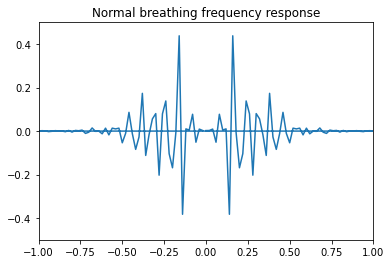

In [10]:
t = np.arange(len(filtered_signal_2))
sp = np.fft.fft(filtered_signal_2)
freq = np.fft.fftfreq(t.shape[-1], d=1/sampling_rate)
print('The frequency of normal breath is', freq[np.argmax(sp.real)])

plt.plot(freq, sp.real)
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)
plt.title('Normal breathing frequency response')

### pulse frequency

Text(0.5, 1.0, 'Normal pulse (Filtered)_bandpass')

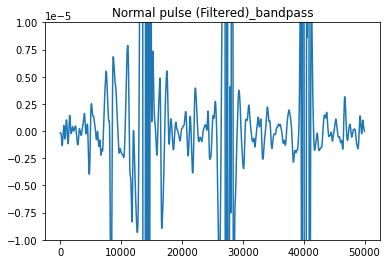

In [6]:
filtered_signal_3 = butter_bandpass_filter(temp_df['Current (A)'].values, 0.5, 3, sampling_rate, 2)
plt.plot(filtered_signal_3)
plt.ylim(-0.00001,0.00001)
plt.title("Normal pulse (Filtered)_bandpass")

[ 0.         0.0200004  0.0400008 ... -0.0600012 -0.0400008 -0.0200004]
The frequency of pulse is 0.6800136002720054


Text(0.5, 1.0, 'Normal pulse frequency response')

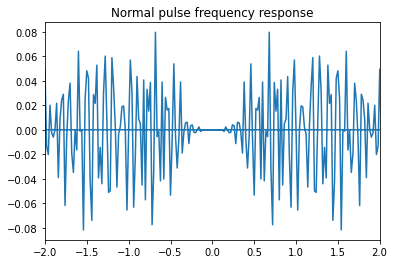

In [11]:
t = np.arange(len(filtered_signal_3))
sp = np.fft.fft(filtered_signal_3)
freq = np.fft.fftfreq(t.shape[-1], d=1/sampling_rate)
print(freq)
print('The frequency of pulse is', freq[np.argmax(sp.real)])

plt.plot(freq, sp.real)
plt.xlim(-2,2)
plt.title('Normal pulse frequency response')